In [89]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm # Colormap for time
import scienceplots
plt.style.use(['science','nature','no-latex','vibrant'])


from scipy.optimize import curve_fit
from scipy.optimize import minimize

#Import personal functions
import sys
#sys.path.append("C:/Users/Olivi/OneDrive - TU Eindhoven/Soft robotic matter/GitHub/Thermal_Soft_Robotics/Functions")
sys.path.append("//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Functions")
import FluidicSetupFunctions
from save_plot_func import save_plot


In [302]:
#Location = r"C:\Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\data_analysis"
Location = r"//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Thermal_actuation/Experimental/Fluidic/Rothmund_Pressure_release"
Foldernames = ["/Data/DS30_r9_h0"]

data = FluidicSetupFunctions.LoadData(Foldernames = Foldernames,Location=Location)

print(data[0][-1].head)

Loading... Folder 1 of 1, Sample 1 of 4
Loading... Folder 1 of 1, Sample 2 of 4
Loading... Folder 1 of 1, Sample 3 of 4
Loading... Folder 1 of 1, Sample 4 of 4
<bound method NDFrame.head of          presFesto-1    AWM5-5   SSCDP15-3      Time
0          -0.000224  0.000029   -8.302554     0.001
1          -0.000098  0.000080  -10.711521     0.002
2          -0.000002  0.000110  -12.133081     0.003
3           0.000068  0.000121  -12.728002     0.004
4           0.000114  0.000116  -12.657052     0.005
...              ...       ...         ...       ...
2120195     0.004288  0.000611  419.308240  2120.196
2120196     0.004268  0.000561  420.921134  2120.197
2120197     0.004251  0.000488  425.536209  2120.198
2120198     0.004238  0.000389  433.696730  2120.199
2120199     0.004229  0.000260  445.945964  2120.200

[2120200 rows x 4 columns]>


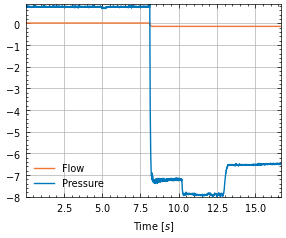

In [268]:
#Plot the profiles over time
#k =0
for i, df in enumerate(data[0]):
    if 'AWM5-5' in df.columns:
        flow = data[0][i]['AWM5-5'].values
    elif 'AWM5-12' in df.columns:
        flow = data[0][i]['AWM5-12'].values


    time = data[0][i]['Time']
    #P_setpoint = data[0][i]['presFesto-1'].values
    # Check which sensor data is available in the DataFrame columns
    if 'SSCDP15-3' in df.columns:
        P = df['SSCDP15-3'].values
        #label = len(df['SSCDP15-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX100-3' in df.columns:
        P = df['MPX100-3'].values
        #label = len(df['MPX100-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX700-2' in df.columns:
        P = df['MPX700-2'].values
        #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    elif 'SSCDP05-3' in df.columns:
        P = df['SSCDP05-3'].values
    #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    elif 'presFesto-1' in df.columns:
        P_setpoint = data[0][i]['presFesto-1'].values
    elif 'presFesto-0' in df.columns:
        P_setpoint = data[0][i]['presFesto-0'].values

    else:
        print(f"Skipping experiment {i+1}: No recognizable sensor data.")
        # Skip this iteration and move to the next experiment

    if i ==0:
        break
        
#with plt.style.context(['science','nature','no-latex','vibrant']):
    #plt.style.use(['no-latex'])
fig, ax = plt.subplots()  # Set figure size here
ax.plot(time, flow, label='Flow')
ax.plot(time, P/1000, label="Pressure")
ax.autoscale(tight=True)
ax.legend()
ax.set_xlabel('Time [$s$]')
ax.grid()
plt.show()


In [ ]:
data[1]

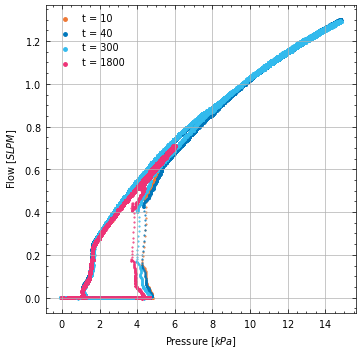

In [304]:
plt.figure(figsize=(4,4))  # Create a new figure for each experiment

data_points = []

for i, df in enumerate(data[0]):
    # (your code to get the P and flow values)
    if 'SSCDP15-3' in df.columns:
        P = df['SSCDP15-3'].values
    elif 'MPX100-3' in df.columns:
        P = df['MPX100-3'].values
    elif 'MPX700-2' in df.columns:
        P = df['MPX700-2'].values
    elif 'SSCDP05-3' in df.columns:
        P = df['SSCDP05-3'].values
    else:
        print(f"Skipping experiment {i+1}: No recognizable sensor data.")
        continue  # Skip this iteration and move to the next experiment

    flow = data[0][i]['AWM5-5'].values  # SLPM

    label = 't = ' + data[1]['Samplename'][i].split('t')[-1]
    number = int(label.split('=')[-1])  # Extract the number part of the label
    data_points.append((P, flow, label, number))

# Sort data points based on numbers
sorted_data = sorted(data_points, key=lambda x: x[3])

# Plot each group of data points with its label
for P, flow, label, _ in sorted_data:
    plt.scatter(P / 1000, flow, label=label, marker='.', s=1)

plt.xlabel('Pressure [$kPa$]')
plt.ylabel('Flow [$SLPM$]')
plt.legend(loc='upper left',markerscale=5)
plt.grid()
#plt.xlim(3.5,5.5)
plt.show()
